In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2
import time
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import tensorflow  as tf
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3, linewidth=120)

In [3]:
def plot_loss(history, name):
    _ = plt.figure(figsize=(13.5, 7.5))
    plt.plot(history.history['loss'], label='Train Loss-' + name)
    plt.plot(history.history['val_loss'], label='Test Loss' + name)
    plt.ylabel("Error")
    plt.xlabel("Epochs")
    plt.legend()
    plt.title("Train- test Erros for " + name)
    plt.show()
    


def plot_predictions(y_test, y_pred, name):
    _ = plt.figure(figsize=(13.5, 7.5))
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values ("+ name+")")
    plt.ylabel("True Values ("+ name+")")
    plt.title("Scatter plot of target values vs predicted values")
    


def plot_error_distribution(y_test, y_pred, name, n_bins):
    error = y_pred - y_test
    plt.hist(error, bins=n_bins)
    plt.xlabel("Prediction Error (" + name + ")")
    plt.ylabel('Count')
    

In [4]:
def mae(y_trues, y_preds):
    return np.mean(np.abs(y_trues-y_preds))

def rmse(y_trues, y_preds):
    return np.sqrt(np.mean(np.power(y_trues-y_preds, 2)))

def mrae(y_trues, y_preds):
    return np.mean(np.abs(np.divide(y_trues -y_preds, y_trues)))

In [5]:
pld_complete_range = pd.read_csv("../../data/pld_complete_range.csv", index_col=False)
# pld_complete = catalog.load('pld_complete').dropna().sort_values('pos', ascending=True)

In [6]:
pld_complete_range.head()

,median_Voltage_HSR_V_1025,median_Voltage_HSR_V_1027,median_Voltage_HSR_V_1030,median_Voltage_HSL_V_1025,median_Voltage_HSL_V_1027,median_Voltage_HSL_V_1030,median_Voltage_HF_V_1025,median_Voltage_HF_V_1027,median_Voltage_HF_V_1030,median_Voltage_HC_V_1025,...,std_Sigma_1030,pos,Speed,X FWHM,Y FWHM,R FWHM,Coolness,Coolness_neg,Ic,Ic_norm
0,0.129479,0.177414,0.005142,0.69562,-0.256257,-0.015406,-0.009215,-0.072807,-0.021102,0.057123,...,-0.390667,-0.501695,0.009841,0.039589,0.067470,0.015697,0.053006,-0.086369,496.2,1.767913
1,0.110059,0.340245,0.005142,0.69562,-0.321465,-0.015406,-0.009215,-0.173901,-0.021102,0.050178,...,-0.390667,-0.501652,-0.005266,0.039589,0.067470,0.015697,0.053006,-0.086369,494.7,1.762568
2,0.119769,0.340245,0.005142,0.69562,-0.321465,-0.015406,-0.007363,-0.173901,-0.021102,0.057123,...,-0.390667,-0.501646,-0.007197,0.039589,0.067470,0.015697,0.053006,-0.086369,494.2,1.760787
3,0.110059,0.348139,0.005142,0.69562,-0.322354,-0.015406,-0.009215,-0.218270,-0.021102,0.057123,...,-0.390667,-0.501635,-0.010946,0.039589,0.067470,0.015697,0.053006,-0.086369,495.5,1.765419
4,0.110059,0.264593,0.005142,0.69562,-0.305820,-0.015406,-0.009215,-0.129533,-0.021102,0.057123,...,-0.390667,-0.501619,-0.017147,0.042682,0.069442,0.017956,0.051965,-0.084836,497.9,1.773168


In [7]:
x_r = pld_complete_range.loc[:, pld_complete_range.columns.isin(['Ic', 'Coolness'])]  # .to_numpy()
y = pld_complete_range['pos']  # .to_numpy()

pos = pld_complete_range['pos']  # .to_numpy()
ic_norm = pld_complete_range['Ic_norm']
ic = pld_complete_range['Ic']

coolness = pld_complete_range['Coolness']
x_r.shape, y.shape, pos.shape

((18561, 2), (18561,), (18561,))

In [8]:
x_r_train, x_r_test, y_train, y_test = train_test_split(x_r, y,
                                                        test_size=0.40,
                                                        random_state=43,)

x_r_val, x_r_test, y_val, y_test = train_test_split(x_r_test, y_test,
                                                        test_size=0.5,
                                                        random_state=43,)


x_r_train.shape, x_r_test.shape, x_r_val.shape, y_train.shape, y_test.shape, y_val.shape

((11136, 2), (3713, 2), (3712, 2), (11136,), (3713,), (3712,))

In [9]:
set(x_r.iloc[:, 1] == ic), set(x_r.iloc[:, 0] == coolness)

({True}, {True})

In [10]:
set(x_r.loc[:, 'Ic'] == ic), set(x_r.loc[:, 'Coolness'] == coolness)

({True}, {True})

In [11]:
x_r_train, x_r_test, y_train, y_test = train_test_split(x_r, y,
                                                        test_size=0.25,
                                                        random_state=43,)

x_r_train.shape, x_r_test.shape, y_train.shape, y_test.shape

((13920, 2), (4641, 2), (13920,), (4641,))

# The Purpose of this study : 

Let us start with the notation:

**Notation:**

Let $D = \{f^{1}_{j}, f^{2}_{j}, ..., p_{j}, c_{j}, i_{j}, f^{M}_{j} \}_{j=1}^{N}$ be our data set. 
Where $N$ represents the number of observations and $M$ represent the number of features (the superscripts represent  the feature indices).
Among all of the features, we are going to focus on three specific features, that is, position $p_j$, coolness $c_j$, critical current $i_j$. (This is why we represent them with different letters than f).

The goal is to match the "coolnesses", the "positions" and the "critical currents" such that for a given $p_j:$ $\frac{c_j}{i_j} \approx constant$


Based on the two following assumptions there would be two possibilities for matching :

1. correlated positions assumption: in this situation we assume that in the current version of data set, there is a correlation between these three features (pos, i_c, cool) --which is to be discovered.

    Concretely, for any $ j$ there exists a $x_j$ such that $p_j \times x_j \approx \frac{i_j}{c_j} = r_j$. 
    Thus, the $x_j$'s can be explained as parameters of a function as follows.
   In other words, there should be a function $F_\phi(i_j, c_j) \approx p_j$ where $\phi$ represent the model parameters to be estimated: such that $x_j \sim \phi$.

    Clearly, the aforementioned case can be treated as a supervised learning problem s.t the position would be the target value and the two remaining items would be the training features.

2. uncorrelated positions assumption: In this situation, we assume that in the current version of data set, there is no correlation between the position's values ($p_j$) and the values of coolness ($c_j$) and critical current ($i_j$).

    Thus the task under this assumption can be solved by applying a greedy search algorithm: to find $p_j$ minimizing $r_{jk}$ as follows. 
    
    -specify a condition, say the ratio between coolness and critical should be minimized.
    
        - Here we define this condition to be the $r_{jk}$ to be minimized.
        - A more complicated condition can be also defined -- though I think some knowledge from the process is needed in this regard. 
        
    \begin{equation}
    \underset{k=1, ..., N}{\operatorname{argmin}} r_{jk}=\frac{i_j}{c_{k}}  \ \ \  j=1, ..., N
    \label{search_k}
    \end{equation}

    That is, any observation $j$ we fix its critical current and its position and then we will find that $c_k$ which the value $r_{jk}$ is minimized(maximized). Ties should be broken randomly (all taken into account at the same time). 
    
    With this setting, we match positions, critical currents and the coolnesses w.r.t to a pre-specified condition.


**Andrey**

Will reply here, since I can write latex

Very much like the second option, as I understand it.


With a bit different description:

In ideal alignment, there is a dependence $I = f(C) + \varepsilon$

When we have distorted alignment, $I\{p_i^I\}$ and $C\{p_j^C\}$ are values of I and C 
known at positions $\{p_i^I\}$ and $\{p_j^C\}$

The task is to find a transformation $\{p_j^C\} \rightarrow^T \{p_j^*\}$ such, that

$$\sum_i |\frac{I\{p_i^I\}}{f(C^*\{p_i^I\})}| \rightarrow min ,$$
    
where $C^*\{p_i^I\}$ are the interpolations of $C\{p_j^*\}$ (values of $C$ are same, but only $p$'s are transformed) at points $\{p_i^I\}$


- f: Ic = A*(100-coolness) + B

A: coeff. depend on $p_{i}$


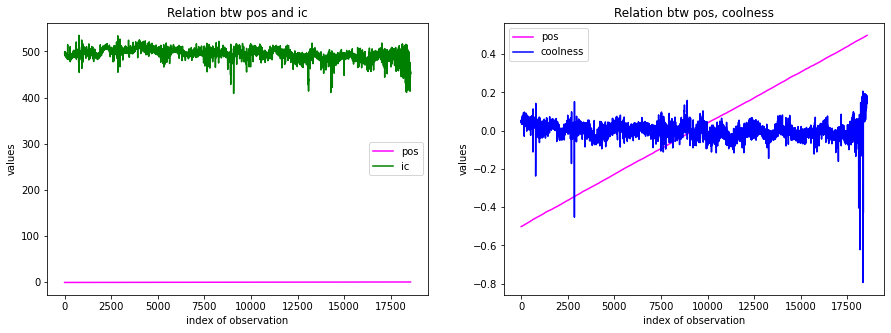

In [12]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(pos, 'magenta', label='pos')
# ax.plot(coolness, 'blue', label='coolness')
ax.plot(ic, 'green', label='ic')
ax.set_xlabel('index of observation')
ax.set_ylabel('values')
ax.set_title('Relation btw pos and ic')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(pos, 'magenta', label='pos')
ax.plot(coolness, 'blue', label='coolness')
# ax.plot(ic_norm, 'green', label='ic_norm')
ax.set_xlabel('index of observation')
ax.set_ylabel('values')
ax.set_title('Relation btw pos, coolness')
ax.legend()

plt.show()

In [48]:
class SetsAligner(tf.keras.Model):
    
    def __init__(self, n_units, n_features, name='sets_aligner', **kwargs):
        super(SetsAligner, self).__init__(name=name, **kwargs)
        self.n_units = n_units
        self.n_features = n_features 
        self.dense_1 = tf.keras.layers.Dense(units=self.n_units, activation='relu', 
                                            input_shape=(self.n_features,))
        self.dense_2 = tf.keras.layers.Dense(units=self.n_units, activation='relu')
        self.predictions = tf.keras.layers.Dense(units=1, activation='linear')
        
    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        predictions = self.predictions(x)
        return predictions



In [49]:
n_units = 5

sets_aligner_model = SetsAligner(n_units=n_units, n_features=x_r.shape[1])


In [50]:
n_epochs = 500
learning_rate = 0.0001
batch_size=256

sets_aligner_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                           loss=tf.keras.losses.MeanSquaredError())

In [51]:
%%time

history = sets_aligner_model.fit(x=x_r_train, y=y_train,
                                validation_data=(x_r_val, y_val), 
                                epochs=n_epochs,
                                batch_size=batch_size)

Epoch 1/500
55/55 [==============================] - 0s 2ms/step - loss: 36196.1559 - val_loss: 34777.3438
Epoch 2/500
55/55 [==============================] - 0s 797us/step - loss: 34354.3936 - val_loss: 33014.7266
Epoch 3/500
55/55 [==============================] - 0s 767us/step - loss: 32607.5093 - val_loss: 31346.7051
Epoch 4/500
55/55 [==============================] - 0s 757us/step - loss: 30953.3992 - val_loss: 29766.8867
Epoch 5/500
55/55 [==============================] - 0s 765us/step - loss: 29401.0859 - val_loss: 28269.9043
Epoch 6/500
55/55 [==============================] - 0s 755us/step - loss: 27928.3389 - val_loss: 26850.0684
Epoch 7/500
55/55 [==============================] - 0s 757us/step - loss: 26532.2304 - val_loss: 25503.1816
Epoch 8/500
55/55 [==============================] - 0s 750us/step - loss: 25201.3999 - val_loss: 24225.3379
Epoch 9/500
55/55 [==============================] - 0s 762us/step - loss: 23928.5338 - val_loss: 23011.8398
Epoch 10/500
55/55 [=

Epoch 77/500
55/55 [==============================] - 0s 789us/step - loss: 250.3173 - val_loss: 229.9385
Epoch 78/500
55/55 [==============================] - 0s 760us/step - loss: 223.7024 - val_loss: 205.0522
Epoch 79/500
55/55 [==============================] - 0s 762us/step - loss: 199.3202 - val_loss: 182.3194
Epoch 80/500
55/55 [==============================] - 0s 757us/step - loss: 177.0641 - val_loss: 161.6035
Epoch 81/500
55/55 [==============================] - 0s 752us/step - loss: 156.8219 - val_loss: 142.7768
Epoch 82/500
55/55 [==============================] - 0s 753us/step - loss: 138.4770 - val_loss: 125.7235
Epoch 83/500
55/55 [==============================] - 0s 783us/step - loss: 121.7574 - val_loss: 110.3239
Epoch 84/500
55/55 [==============================] - 0s 759us/step - loss: 106.8807 - val_loss: 96.4646
Epoch 85/500
55/55 [==============================] - 0s 755us/step - loss: 93.3033 - val_loss: 84.0310
Epoch 86/500
55/55 [=============================

55/55 [==============================] - 0s 759us/step - loss: 0.0790 - val_loss: 0.0761
Epoch 157/500
55/55 [==============================] - 0s 767us/step - loss: 0.0780 - val_loss: 0.0761
Epoch 158/500
55/55 [==============================] - 0s 762us/step - loss: 0.0797 - val_loss: 0.0761
Epoch 159/500
55/55 [==============================] - 0s 771us/step - loss: 0.0788 - val_loss: 0.0761
Epoch 160/500
55/55 [==============================] - 0s 766us/step - loss: 0.0793 - val_loss: 0.0761
Epoch 161/500
55/55 [==============================] - 0s 754us/step - loss: 0.0791 - val_loss: 0.0761
Epoch 162/500
55/55 [==============================] - 0s 763us/step - loss: 0.0791 - val_loss: 0.0761
Epoch 163/500
55/55 [==============================] - 0s 778us/step - loss: 0.0792 - val_loss: 0.0761
Epoch 164/500
55/55 [==============================] - 0s 759us/step - loss: 0.0787 - val_loss: 0.0761
Epoch 165/500
55/55 [==============================] - 0s 762us/step - loss: 0.0790 - v

55/55 [==============================] - 0s 766us/step - loss: 0.0790 - val_loss: 0.0761
Epoch 236/500
55/55 [==============================] - 0s 761us/step - loss: 0.0795 - val_loss: 0.0761
Epoch 237/500
55/55 [==============================] - 0s 751us/step - loss: 0.0790 - val_loss: 0.0761
Epoch 238/500
55/55 [==============================] - 0s 751us/step - loss: 0.0782 - val_loss: 0.0761
Epoch 239/500
55/55 [==============================] - 0s 751us/step - loss: 0.0785 - val_loss: 0.0761
Epoch 240/500
55/55 [==============================] - 0s 746us/step - loss: 0.0785 - val_loss: 0.0761
Epoch 241/500
55/55 [==============================] - 0s 751us/step - loss: 0.0789 - val_loss: 0.0761
Epoch 242/500
55/55 [==============================] - 0s 747us/step - loss: 0.0789 - val_loss: 0.0761
Epoch 243/500
55/55 [==============================] - 0s 744us/step - loss: 0.0794 - val_loss: 0.0761
Epoch 244/500
55/55 [==============================] - 0s 743us/step - loss: 0.0790 - v

55/55 [==============================] - 0s 839us/step - loss: 0.0787 - val_loss: 0.0761
Epoch 315/500
55/55 [==============================] - 0s 760us/step - loss: 0.0786 - val_loss: 0.0760
Epoch 316/500
55/55 [==============================] - 0s 769us/step - loss: 0.0795 - val_loss: 0.0760
Epoch 317/500
55/55 [==============================] - 0s 758us/step - loss: 0.0789 - val_loss: 0.0760
Epoch 318/500
55/55 [==============================] - 0s 758us/step - loss: 0.0790 - val_loss: 0.0760
Epoch 319/500
55/55 [==============================] - 0s 757us/step - loss: 0.0791 - val_loss: 0.0761
Epoch 320/500
55/55 [==============================] - 0s 758us/step - loss: 0.0784 - val_loss: 0.0761
Epoch 321/500
55/55 [==============================] - 0s 748us/step - loss: 0.0792 - val_loss: 0.0764
Epoch 322/500
55/55 [==============================] - 0s 749us/step - loss: 0.0797 - val_loss: 0.0760
Epoch 323/500
55/55 [==============================] - 0s 753us/step - loss: 0.0792 - v

55/55 [==============================] - 0s 768us/step - loss: 0.0784 - val_loss: 0.0760
Epoch 394/500
55/55 [==============================] - 0s 764us/step - loss: 0.0788 - val_loss: 0.0756
Epoch 395/500
55/55 [==============================] - 0s 752us/step - loss: 0.0792 - val_loss: 0.0756
Epoch 396/500
55/55 [==============================] - 0s 752us/step - loss: 0.0792 - val_loss: 0.0755
Epoch 397/500
55/55 [==============================] - 0s 757us/step - loss: 0.0796 - val_loss: 0.0755
Epoch 398/500
55/55 [==============================] - 0s 758us/step - loss: 0.0782 - val_loss: 0.0756
Epoch 399/500
55/55 [==============================] - 0s 754us/step - loss: 0.0793 - val_loss: 0.0755
Epoch 400/500
55/55 [==============================] - 0s 762us/step - loss: 0.0790 - val_loss: 0.0758
Epoch 401/500
55/55 [==============================] - 0s 764us/step - loss: 0.0790 - val_loss: 0.0755
Epoch 402/500
55/55 [==============================] - 0s 754us/step - loss: 0.0792 - v

55/55 [==============================] - 0s 766us/step - loss: 0.0774 - val_loss: 0.0750
Epoch 473/500
55/55 [==============================] - 0s 766us/step - loss: 0.0781 - val_loss: 0.0750
Epoch 474/500
55/55 [==============================] - 0s 764us/step - loss: 0.0781 - val_loss: 0.0756
Epoch 475/500
55/55 [==============================] - 0s 749us/step - loss: 0.0783 - val_loss: 0.0750
Epoch 476/500
55/55 [==============================] - 0s 769us/step - loss: 0.0787 - val_loss: 0.0750
Epoch 477/500
55/55 [==============================] - 0s 766us/step - loss: 0.0791 - val_loss: 0.0750
Epoch 478/500
55/55 [==============================] - 0s 781us/step - loss: 0.0782 - val_loss: 0.0776
Epoch 479/500
55/55 [==============================] - 0s 742us/step - loss: 0.0804 - val_loss: 0.0750
Epoch 480/500
55/55 [==============================] - 0s 753us/step - loss: 0.0777 - val_loss: 0.0752
Epoch 481/500
55/55 [==============================] - 0s 757us/step - loss: 0.0771 - v

In [52]:
sets_aligner_model.summary()

Model: "sets_aligner"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             multiple                  15        
_________________________________________________________________
dense_16 (Dense)             multiple                  30        
_________________________________________________________________
dense_17 (Dense)             multiple                  6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


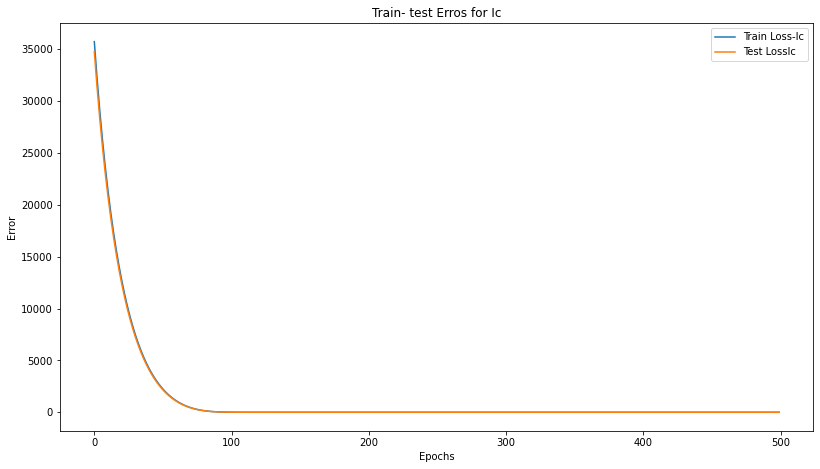

In [53]:
plot_loss(history=history, name='Ic')

In [54]:
y_hat = sets_aligner_model.predict(x_r_test)[:, 0]


mae_ic = mae(y_trues=y_test, y_preds=y_hat)
rmse_ic = rmse(y_trues=y_test, y_preds=y_hat)
mrae_ic = mrae(y_trues=y_test, y_preds=y_hat)

print("DNN-Regression Performance for Ic:", 
     "MAE: %.3f" % mae_ic, 
      "RMSE: %.3f" % rmse_ic, 
      "MRAE: %.3f" % mrae_ic,)

DNN-Regression Performance for Ic: MAE: 0.237 RMSE: 0.275 MRAE: 1.260
